ข้อมูลที่ใช้เป็นข้อมูลของผู้ป่วยโรค COVID-19 ในแต่ละประเทศทั้งโลก ตั้งแต่วันที่มีการ Outbreak ของเชื้อโรค 22/01/2020 จนถึงปัจจุบัน โดยสิ่งที่จะให้ทำนายนั้นคือ (1) จำนวนผู้ติดเชื้อโดยรวมของทั้งโลก และ (2) จำนวนผู้ติดเชื้อโดยรวมของประเทศในเอเชียตะวันออกเฉียงใต้ ทั้ง 11 ประเทศ ล่วงหน้า 1-7 วัน ซึ่งสามารถดาวน์โหลดข้อมูลได้จาก https://github.com/owid/covid-19-data/tree/master/public/data

Regression Task: ส่ง Predicted Label ของการทำนายได้ที่ https://www.kaggle.com/competitions/covid-19-cases-prediction-it-kmitl-2021 โดยส่งรายละเอียดดังนี้ จำนวนผู้ติดเชื้อโดยรวมของทั้งโลกล่วงหน้า 1-7 วัน และ จำนวนผู้ติดเชื้อโดยรวมของแต่ละประเทศในเอเชียตะวันออกเฉียงใต้ ทั้ง 11 ประเทศ ล่วงหน้า 1-7 วัน โดยมีลำดับดังนี้ Indonesia, Vietnam, Thailand, Philippines, Singapore, Malaysia, Myanmar, Laos, Cambodia, Brunei, Timor-Leste โดยใน Kaggle ช่วงเวลาที่ให้ทำนาย คือ 17-23 เมษายน 2022 ดังนั้นข้อมูลที่ใช้ในการฝึกฝนจะต้องเป็นช่วงเวลาก่อนหน้าวันที่ 17 เมษายน 2022 เท่านั้น อย่างไรก็ตามการให้คะแนนการจัดอันดับของ Task นี้จะวัดจากผลจริงในช่วง 9-15 พฤษภาคม 2022 เท่านั้น โดยให้ส่ง Predicted Label มาที่ Onlearn ก่อน Deadline วัดผลโดย Mean Square Error

# Import Library

In [1]:
pip install prophet

     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 45 kB 2.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640091 sha256=b25e5aebe7ce54222316017b78f60a519a35ab3bced1008f5fb7271c79e59a51
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:

import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Import Dataset

In [5]:
dataset = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184049,ZWE,Africa,Zimbabwe,2022-05-01,247911.0,36.0,55.286,5469.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
184050,ZWE,Africa,Zimbabwe,2022-05-02,247935.0,24.0,48.143,5470.0,1.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
184051,ZWE,Africa,Zimbabwe,2022-05-03,247990.0,55.0,46.143,5470.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
184052,ZWE,Africa,Zimbabwe,2022-05-04,248050.0,60.0,45.857,5471.0,1.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Data Preparation

In [6]:
dataset.shape

(184054, 67)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184054 entries, 0 to 184053
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    184054 non-null  object 
 1   continent                                   173305 non-null  object 
 2   location                                    184054 non-null  object 
 3   date                                        184054 non-null  object 
 4   total_cases                                 177201 non-null  float64
 5   new_cases                                   177023 non-null  float64
 6   new_cases_smoothed                          175854 non-null  float64
 7   total_deaths                                158911 non-null  float64
 8   new_deaths                                  158917 non-null  float64
 9   new_deaths_smoothed                         157760 non-null  float64
 

In [8]:
dataset.isnull().sum().to_frame('null count')

,null count
iso_code,0
continent,10749
location,0
date,0
total_cases,6853
...,...
human_development_index,35914
excess_mortality_cumulative_absolute,177695
excess_mortality_cumulative,177695
excess_mortality,177695


In [9]:
dataset = dataset.fillna(0)
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184049,ZWE,Africa,Zimbabwe,2022-05-01,247911.0,36.0,55.286,5469.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184050,ZWE,Africa,Zimbabwe,2022-05-02,247935.0,24.0,48.143,5470.0,1.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184051,ZWE,Africa,Zimbabwe,2022-05-03,247990.0,55.0,46.143,5470.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184052,ZWE,Africa,Zimbabwe,2022-05-04,248050.0,60.0,45.857,5471.0,1.0,0.286,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


In [9]:
# Filter Date
dataset = dataset[dataset['date'] <= '2022-04-16']
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184030,ZWE,Africa,Zimbabwe,2022-04-12,247094.0,84.0,50.000,5460.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184031,ZWE,Africa,Zimbabwe,2022-04-13,247160.0,66.0,51.000,5460.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184032,ZWE,Africa,Zimbabwe,2022-04-14,247208.0,48.0,48.286,5462.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
184033,ZWE,Africa,Zimbabwe,2022-04-15,247237.0,29.0,44.571,5462.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


In [10]:
list_location = ['World', 'Indonesia', 'Vietnam', 'Thailand', 'Philippines', 'Singapore', 'Malaysia', 'Myanmar', 'Laos', 'Cambodia', 'Brunei', 'Timor']
dataset = dataset[dataset['location'].isin(list_location)]
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
24642,BRN,Asia,Brunei,2020-03-09,1.0,1.0,0.000,0.0,0.0,0.000,...,2.000,30.900,0.00,2.700,75.86,0.838,0.0,0.0,0.0,0.0
24643,BRN,Asia,Brunei,2020-03-10,1.0,0.0,0.000,0.0,0.0,0.000,...,2.000,30.900,0.00,2.700,75.86,0.838,0.0,0.0,0.0,0.0
24644,BRN,Asia,Brunei,2020-03-11,11.0,10.0,0.000,0.0,0.0,0.000,...,2.000,30.900,0.00,2.700,75.86,0.838,0.0,0.0,0.0,0.0
24645,BRN,Asia,Brunei,2020-03-12,11.0,0.0,0.000,0.0,0.0,0.000,...,2.000,30.900,0.00,2.700,75.86,0.838,0.0,0.0,0.0,0.0
24646,BRN,Asia,Brunei,2020-03-13,37.0,26.0,0.000,0.0,0.0,0.000,...,2.000,30.900,0.00,2.700,75.86,0.838,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181737,OWID_WRL,0,World,2022-05-01,513805783.0,326740.0,591956.000,6236553.0,915.0,2599.000,...,6.434,34.635,60.13,2.705,72.58,0.737,0.0,0.0,0.0,0.0
181738,OWID_WRL,0,World,2022-05-02,514269025.0,463242.0,574385.571,6238328.0,1783.0,2509.143,...,6.434,34.635,60.13,2.705,72.58,0.737,0.0,0.0,0.0,0.0
181739,OWID_WRL,0,World,2022-05-03,514975396.0,709771.0,582512.857,6240940.0,2628.0,2263.857,...,6.434,34.635,60.13,2.705,72.58,0.737,0.0,0.0,0.0,0.0
181740,OWID_WRL,0,World,2022-05-04,515594423.0,619027.0,550363.714,6244913.0,3973.0,2323.000,...,6.434,34.635,60.13,2.705,72.58,0.737,0.0,0.0,0.0,0.0


# Visualization

## Worldwide

In [11]:
groupby_total = dataset.groupby('date').sum()['total_cases'].reset_index()

In [12]:
df_by_date = pd.DataFrame(groupby_total.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Worldwide growth COVID-19 total cases')
fig.show()

In [13]:
groupby_total['daily_cases'] = groupby_total['total_cases'].sub(groupby_total['total_cases'].shift())
groupby_total['daily_cases'].iloc[0] = groupby_total['total_cases'].iloc[0]
groupby_total['daily_cases'] = groupby_total['daily_cases'].astype(int)
fig = px.bar(groupby_total, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Worldwode COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Southeast Asia

In [14]:
country = dataset[dataset.location != 'World']

In [15]:
groupby_country = country.groupby(['location','date'])['total_cases'].sum()  \
                          .groupby(['location']).max().sort_values() \
                          .groupby(['location']).sum().sort_values(ascending = False)

df_groupby_country = pd.DataFrame(groupby_country)
df_groupby_country

,total_cases
location,
Vietnam,10417887.0
Indonesia,6039266.0
Malaysia,4382402.0
Thailand,4029959.0
Philippines,3682847.0
Singapore,1157251.0
Myanmar,612545.0
Laos,199868.0
Brunei,139847.0


In [16]:
fig = px.bar(df_groupby_country, x=df_groupby_country.index, y='total_cases', labels={'x':'Country'},
             color="total_cases")
fig.update_layout(title_text='COVID-19 total cases by country (SEA)')
fig.show()

## Country in SEA

In [17]:
# สำหรับทีละประเทศ
def filterLocation(location): 
  return dataset[dataset['location'] == location][['date', 'total_cases']].reset_index(drop=True)

In [18]:
# select location
world_data = filterLocation('World')
idn_data = filterLocation('Indonesia')
vnm_data = filterLocation('Vietnam')
tha_data = filterLocation('Thailand')
phl_data = filterLocation('Philippines')
sgp_data = filterLocation('Singapore')
mys_data = filterLocation('Malaysia')
mmr_data = filterLocation('Myanmar')
lao_data = filterLocation('Laos')
khm_data = filterLocation('Cambodia')
brn_data = filterLocation('Brunei')
tls_data = filterLocation('Timor')

Indonesia

In [19]:
df_by_date = pd.DataFrame(idn_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Indonesia growth COVID-19 total cases')
fig.show()

In [20]:
idn_data['daily_cases'] = idn_data['total_cases'].sub(idn_data['total_cases'].shift())
idn_data['daily_cases'].iloc[0] = idn_data['total_cases'].iloc[0]
idn_data['daily_cases'] = idn_data['daily_cases'].astype(int)
fig = px.bar(idn_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Indonesia COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vietnam

In [21]:
df_by_date = pd.DataFrame(vnm_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Vietnam growth COVID-19 total cases')
fig.show()

In [22]:
vnm_data['daily_cases'] = vnm_data['total_cases'].sub(vnm_data['total_cases'].shift())
vnm_data['daily_cases'].iloc[0] = vnm_data['total_cases'].iloc[0]
vnm_data['daily_cases'] = vnm_data['daily_cases'].astype(int)
fig = px.bar(vnm_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Vietnam COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Thailand

In [23]:
df_by_date = pd.DataFrame(tha_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Thailand growth COVID-19 total cases')
fig.show()

In [24]:
tha_data['daily_cases'] = tha_data['total_cases'].sub(tha_data['total_cases'].shift())
tha_data['daily_cases'].iloc[0] = tha_data['total_cases'].iloc[0]
tha_data['daily_cases'] = tha_data['daily_cases'].astype(int)
fig = px.bar(tha_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Thailand COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Philippines

In [25]:
df_by_date = pd.DataFrame(phl_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Philippines growth COVID-19 total cases')
fig.show()

In [26]:
phl_data['daily_cases'] = phl_data['total_cases'].sub(phl_data['total_cases'].shift())
phl_data['daily_cases'].iloc[0] = phl_data['total_cases'].iloc[0]
phl_data['daily_cases'] = phl_data['daily_cases'].astype(int)
fig = px.bar(phl_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Philippines COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Singapore

In [27]:
df_by_date = pd.DataFrame(sgp_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Singapore growth COVID-19 total cases')
fig.show()

In [28]:
sgp_data['daily_cases'] = sgp_data['total_cases'].sub(sgp_data['total_cases'].shift())
sgp_data['daily_cases'].iloc[0] = sgp_data['total_cases'].iloc[0]
sgp_data['daily_cases'] = sgp_data['daily_cases'].astype(int)
fig = px.bar(sgp_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Singapore COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Malaysia

In [29]:
df_by_date = pd.DataFrame(mys_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Malaysia growth COVID-19 total cases')
fig.show()

In [30]:
mys_data['daily_cases'] = mys_data['total_cases'].sub(mys_data['total_cases'].shift())
mys_data['daily_cases'].iloc[0] = mys_data['total_cases'].iloc[0]
mys_data['daily_cases'] = mys_data['daily_cases'].astype(int)
fig = px.bar(mys_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Malaysia COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Myanmar

In [31]:
df_by_date = pd.DataFrame(mmr_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Myanmar growth COVID-19 total cases')
fig.show()

In [32]:
mmr_data['daily_cases'] = mmr_data['total_cases'].sub(mmr_data['total_cases'].shift())
mmr_data['daily_cases'].iloc[0] = mmr_data['total_cases'].iloc[0]
mmr_data['daily_cases'] = mmr_data['daily_cases'].astype(int)
fig = px.bar(mmr_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Myanmar COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Laos

In [33]:
df_by_date = pd.DataFrame(lao_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Laos growth COVID-19 total cases')
fig.show()

In [34]:
lao_data['daily_cases'] = lao_data['total_cases'].sub(lao_data['total_cases'].shift())
lao_data['daily_cases'].iloc[0] = lao_data['total_cases'].iloc[0]
lao_data['daily_cases'] = lao_data['daily_cases'].astype(int)
fig = px.bar(lao_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Laos COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Cambodia

In [35]:
df_by_date = pd.DataFrame(khm_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Cambodia growth COVID-19 total cases')
fig.show()

In [36]:
khm_data['daily_cases'] = khm_data['total_cases'].sub(khm_data['total_cases'].shift())
khm_data['daily_cases'].iloc[0] = khm_data['total_cases'].iloc[0]
khm_data['daily_cases'] = khm_data['daily_cases'].astype(int)
fig = px.bar(khm_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Cambodia COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Brunei

In [37]:
df_by_date = pd.DataFrame(brn_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Brunei growth COVID-19 total cases')
fig.show()

In [38]:
brn_data['daily_cases'] = brn_data['total_cases'].sub(brn_data['total_cases'].shift())
brn_data['daily_cases'].iloc[0] = brn_data['total_cases'].iloc[0]
brn_data['daily_cases'] = brn_data['daily_cases'].astype(int)
fig = px.bar(brn_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Brunei COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Timor

In [39]:
df_by_date = pd.DataFrame(tls_data.groupby(['date'])['total_cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[df_by_date.date >= '2020-01-22'].sort_values('total_cases',ascending = False), 
             x='date', y='total_cases', color="total_cases")
fig.update_layout(title_text='Timor growth COVID-19 total cases')
fig.show()

In [40]:
tls_data['daily_cases'] = tls_data['total_cases'].sub(tls_data['total_cases'].shift())
tls_data['daily_cases'].iloc[0] = tls_data['total_cases'].iloc[0]
tls_data['daily_cases'] = tls_data['daily_cases'].astype(int)
fig = px.bar(tls_data, y='daily_cases', x='date',hover_data =['daily_cases'], color='daily_cases', height=500)
fig.update_layout(title='Timor COVID-19 daily cases')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Modeling + Evaluate Model

##1.   Linear Regression


In [41]:
def count_days_since(data):
  return data.index - data.index[0]

In [43]:
def LinearRegressionModel(data):
  data["count_days"] = count_days_since(data)
  data_train = data.iloc[:int(data.shape[0]*0.70)]
  data_test = data.iloc[int(data.shape[0]*0.70):]
  days_in_future = 7
  future_forecast = np.array([i for i in range(len(data_test["count_days"])+days_in_future)]).reshape(-1, 1)
  df_future_forecast = pd.DataFrame(future_forecast)
  lr_model = LinearRegression(normalize=True)
  lr_model.fit(np.array(data_train["count_days"]).reshape(-1,1),np.array(data_train["total_cases"]).reshape(-1,1))
  data_lr_pred = lr_model.predict(np.array(data_test["count_days"]).reshape(-1,1))
  MSE = mean_squared_error(data_test["total_cases"], data_lr_pred)
  print("Mean Square Error for Linear Regression:", MSE)

  data_lr_forecast = lr_model.predict(df_future_forecast).reshape(-1,1)
  data_lr_forecast = pd.DataFrame(data_lr_forecast)
  data_lr_result = data_lr_forecast.tail(7).reset_index(drop=True)
  print(data_lr_result)

  return MSE, data_lr_result

Worldwide

In [45]:
MSE, world_lr_result = LinearRegressionModel(world_data)

Mean Square Error for Linear Regression: 1.2492910752781832e+16
              0
0  5.550997e+07
1  5.590470e+07
2  5.629942e+07
3  5.669415e+07
4  5.708887e+07
5  5.748359e+07
6  5.787832e+07


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Indonesia

In [47]:
MSE, idn_lr_result = LinearRegressionModel(idn_data)

Mean Square Error for Linear Regression: 2121765772376.1
               0
0  715413.589035
1  721403.618896
2  727393.648757
3  733383.678618
4  739373.708479
5  745363.738341
6  751353.768202


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Vietnam

In [48]:
MSE, vnm_lr_result = LinearRegressionModel(vnm_data)

Mean Square Error for Linear Regression: 14523752284275.98
             0
0  6494.401727
1  6588.076345
2  6681.750962
3  6775.425580
4  6869.100197
5  6962.774815
6  7056.449433


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Thailand

In [49]:
MSE, tha_lr_result = LinearRegressionModel(tha_data)

Mean Square Error for Linear Regression: 4472465975063.96
              0
0  35823.570183
1  36277.567549
2  36731.564915
3  37185.562282
4  37639.559648
5  38093.557014
6  38547.554381


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Philippines

In [50]:
MSE, phl_lr_result = LinearRegressionModel(phl_data)

Mean Square Error for Linear Regression: 1904811923591.9182
               0
0  383070.575760
1  385949.758411
2  388828.941061
3  391708.123711
4  394587.306361
5  397466.489011
6  400345.671661


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Singapore

In [51]:
MSE, sgp_lr_result = LinearRegressionModel(sgp_data)

Mean Square Error for Linear Regression: 196088298099.71014
              0
0  41747.667648
1  41861.252389
2  41974.837129
3  42088.421870
4  42202.006611
5  42315.591352
6  42429.176093


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Malaysia

In [52]:
MSE, mys_lr_result = LinearRegressionModel(mys_data)

Mean Square Error for Linear Regression: 4206542069517.0356
               0
0  151277.211455
1  152824.847689
2  154372.483924
3  155920.120159
4  157467.756393
5  159015.392628
6  160563.028862


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Myanmar

In [53]:
MSE, mmr_lr_result = LinearRegressionModel(mmr_data)

Mean Square Error for Linear Regression: 45247120460.18769
              0
0  76233.786443
1  76820.941000
2  77408.095556
3  77995.250112
4  78582.404669
5  79169.559225
6  79756.713782


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Laos

In [54]:
MSE, lao_lr_result = LinearRegressionModel(lao_data)

Mean Square Error for Linear Regression: 11120036007.074114
            0
0  718.412267
1  729.049771
2  739.687276
3  750.324780
4  760.962285
5  771.599789
6  782.237294


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Cambodia

In [55]:
MSE, khm_lr_result = LinearRegressionModel(khm_data)

Mean Square Error for Linear Regression: 5632768790.212107
             0
0  6320.625662
1  6405.551916
2  6490.478170
3  6575.404423
4  6660.330677
5  6745.256931
6  6830.183185


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Brunei

In [56]:
MSE, brn_lr_result = LinearRegressionModel(brn_data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Mean Square Error for Linear Regression: 3253889090.6554875
            0
0  188.032158
1  188.755167
2  189.478175
3  190.201184
4  190.924193
5  191.647201
6  192.370210


Timor

In [57]:
MSE, tls_lr_result = LinearRegressionModel(tls_data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





Mean Square Error for Linear Regression: 113766595.69163921
             0
0  1495.526494
1  1515.665384
2  1535.804273
3  1555.943163
4  1576.082052
5  1596.220942
6  1616.359831


In [58]:
# combine result
list_lr_result = [world_lr_result, idn_lr_result, vnm_lr_result, tha_lr_result, phl_lr_result, sgp_lr_result, mys_lr_result, mmr_lr_result
, lao_lr_result, khm_lr_result, brn_lr_result, tls_lr_result]
final_lr_result = pd.concat(list_lr_result).reset_index(drop=True)
final_lr_result

,0
0,5.550997e+07
1,5.590470e+07
2,5.629942e+07
3,5.669415e+07
4,5.708887e+07
...,...
79,1.535804e+03
80,1.555943e+03
81,1.576082e+03
82,1.596221e+03


## 2.   Support Vector Regression (SVR)



In [59]:
def SVRModel(data):
  data["count_days"] = count_days_since(data)
  data_train = data.iloc[:int(data.shape[0]*0.70)]
  data_test = data.iloc[int(data.shape[0]*0.70):]
  days_in_future = 7
  future_forecast = np.array([i for i in range(len(data_test["count_days"])+days_in_future)]).reshape(-1, 1)
  df_future_forecast = pd.DataFrame(future_forecast)
  svr_model = SVR(shrinking=True, kernel='poly',gamma=0.01,epsilon=1,degree=3,C=0.1)
  svr_model.fit(np.array(data_train["count_days"]).reshape(-1,1),np.array(data_train["total_cases"]).reshape(-1,1))
  data_svr_pred = svr_model.predict(np.array(data_test["count_days"]).reshape(-1,1))
  MSE = mean_squared_error(data_test["total_cases"], data_svr_pred)
  print("Mean Square Error for :", MSE)

  data_svr_forecast = svr_model.predict(df_future_forecast).reshape(-1,1)
  data_svr_forecast = pd.DataFrame(data_svr_forecast)
  data_svr_result = data_svr_forecast.tail(7).reset_index(drop=True)
  print(data_svr_result)

  return MSE, data_svr_result

Worldwide

In [60]:
MSE, world_svr_result = SVRModel(world_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 3.0869371625463824e+16
              0
0  2.904775e+07
1  2.929941e+07
2  2.955312e+07
3  2.980889e+07
4  3.006674e+07
5  3.032666e+07
6  3.058867e+07


Indonesia

In [61]:
MSE, idn_svr_result = SVRModel(idn_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 8012014509151.957
               0
0  328196.243713
1  332078.835861
2  335994.754779
3  339944.142889
4  343927.142599
5  347943.896363
6  351994.546566


Vietnam

In [62]:
MSE, vnm_svr_result = SVRModel(vnm_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 14675155941678.346
            0
0  896.770089
1  906.975162
2  917.263536
3  927.635546
4  938.091558
5  948.631880
6  959.256858


Thailand

In [63]:
MSE, tha_svr_result = SVRModel(tha_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 4283080772517.5776
             0
0  8977.667412
1  9121.072646
2  9265.620543
3  9411.315640
4  9558.162483
5  9706.165585
6  9855.329487


Philippines

In [64]:
MSE, phl_svr_result = SVRModel(phl_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 463064970184.1026
               0
0  157639.382841
1  159461.003816
2  161297.617469
3  163149.285253
4  165016.068614
5  166898.028982
6  168795.227815


Singapore

In [65]:
MSE, sgp_svr_result = SVRModel(sgp_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 205041771264.8436
              0
0  54750.801384
1  54763.735237
2  54776.774675
3  54789.920122
4  54803.172026
5  54816.530799
6  54829.996852


Malaysia

In [66]:
MSE, mys_svr_result = SVRModel(mys_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 1360216532535.824
              0
0  49892.330289
1  50787.452206
2  51689.881189
3  52599.646963
4  53516.779241
5  54441.307678
6  55373.262022


Myanmar

In [67]:
MSE, mmr_svr_result = SVRModel(mmr_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 44759535516.258995
              0
0  29192.864376
1  29581.939202
2  29974.457150
3  30370.433384
4  30769.883063
5  31172.821375
6  31579.263469


Laos

In [68]:
MSE, lao_svr_result = SVRModel(lao_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 10842445959.774706
            0
0  158.140408
1  161.639529
2  165.169475
3  168.730402
4  172.322409
5  175.945666
6  179.600286


Cambodia

In [69]:
MSE, khm_svr_result = SVRModel(khm_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 2005306548.4085534
             0
0  1858.669908
1  1900.003238
2  1941.675378
3  1983.687695
4  2026.041568
5  2068.738383
6  2111.779514


Brunei

In [70]:
MSE, brn_svr_result = SVRModel(brn_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 3220339458.2804546
            0
0  164.506460
1  164.880442
2  165.257656
3  165.638128
4  166.021864
5  166.408877
6  166.799189


Timor

In [71]:
MSE, tls_svr_result = SVRModel(tls_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean Square Error for : 53396802.50976295
            0
0  581.117420
1  595.279847
2  609.567063
3  623.979601
4  638.518001
5  653.182837
6  667.974637


In [72]:
# combine result
list_svr_result = [world_svr_result, idn_svr_result, vnm_svr_result, tha_svr_result, phl_svr_result, sgp_svr_result, mys_svr_result, mmr_svr_result
, lao_svr_result, khm_svr_result, brn_svr_result, tls_svr_result]
final_svr_result = pd.concat(list_svr_result).reset_index(drop=True)
final_svr_result

,0
0,2.904775e+07
1,2.929941e+07
2,2.955312e+07
3,2.980889e+07
4,3.006674e+07
...,...
79,6.095671e+02
80,6.239796e+02
81,6.385180e+02
82,6.531828e+02


## 3. Prophet

In [73]:
world_data = world_data.drop(['count_days'], axis=1)
idn_data = idn_data.drop(['count_days'], axis=1)
vnm_data = vnm_data.drop(['count_days'], axis=1)
tha_data = tha_data.drop(['count_days'], axis=1)
phl_data = phl_data.drop(['count_days'], axis=1)
sgp_data = sgp_data.drop(['count_days'], axis=1)
mys_data = mys_data.drop(['count_days'], axis=1)
mmr_data = mmr_data.drop(['count_days'], axis=1)
lao_data = lao_data.drop(['count_days'], axis=1)
khm_data = khm_data.drop(['count_days'], axis=1)
brn_data = brn_data.drop(['count_days'], axis=1)
tls_data = tls_data.drop(['count_days'], axis=1)

In [74]:
def rename_X_y(data):
  return data.rename(columns={"date": "ds", "total_cases": "y"})

In [75]:
def ProphetModel(data):
  data = rename_X_y(data)
  model = Prophet(yearly_seasonality=False, daily_seasonality=False)
  model.fit(data)
  future = model.make_future_dataframe(periods=7)
  forecast = model.predict(future)
  forecast['yhat'] = forecast['yhat'].astype(int)
  predict = forecast[['ds', 'yhat','yhat_lower','yhat_upper']]
  predict_week = predict.tail(7).reset_index(drop=True)
  plot = model.plot(forecast)
  y_true = data['y']
  y_pred = forecast['yhat']
  MSE = mean_squared_error(y_true, y_pred[:-7])
  print("Mean Square Error :", MSE)
  
  return predict_week, plot

World

Mean Square Error : 74127565761809.12


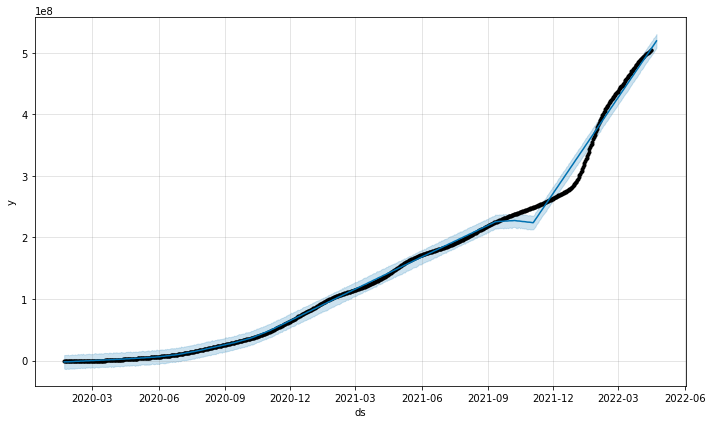

In [76]:
world_pred, world_plot = ProphetModel(world_data)

In [77]:
world_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,508681482,4.972190e+08,5.194329e+08
1,2022-04-18,510365203,4.992346e+08,5.212668e+08
2,2022-04-19,512118204,5.006111e+08,5.241353e+08
3,2022-04-20,513938320,5.029279e+08,5.245617e+08
4,2022-04-21,515731019,5.041842e+08,5.263462e+08
5,2022-04-22,517508367,5.062298e+08,5.282389e+08
6,2022-04-23,519163802,5.082885e+08,5.301693e+08


Indonesia

Mean Square Error : 27939580993.14433


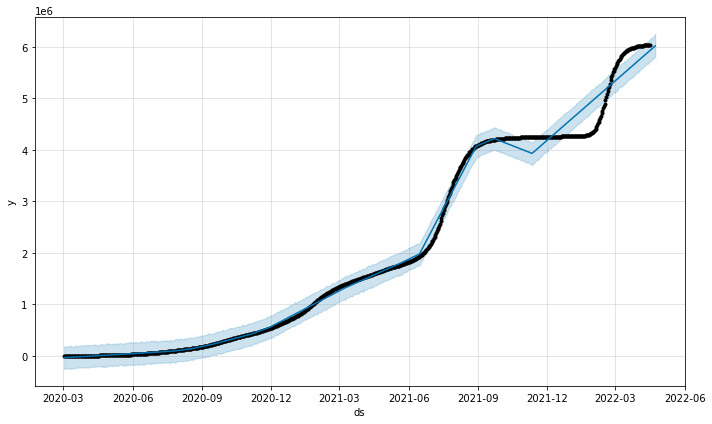

In [78]:
idn_pred, idn_plot = ProphetModel(idn_data)

In [79]:
idn_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,5944889,5.739539e+06,6.163170e+06
1,2022-04-18,5956704,5.742583e+06,6.176628e+06
2,2022-04-19,5969817,5.765423e+06,6.179312e+06
3,2022-04-20,5983256,5.759882e+06,6.189286e+06
4,2022-04-21,5996932,5.782925e+06,6.212983e+06
5,2022-04-22,6010289,5.805769e+06,6.233962e+06
6,2022-04-23,6023325,5.799462e+06,6.249085e+06


Vietnam

Mean Square Error : 567828237500.0123


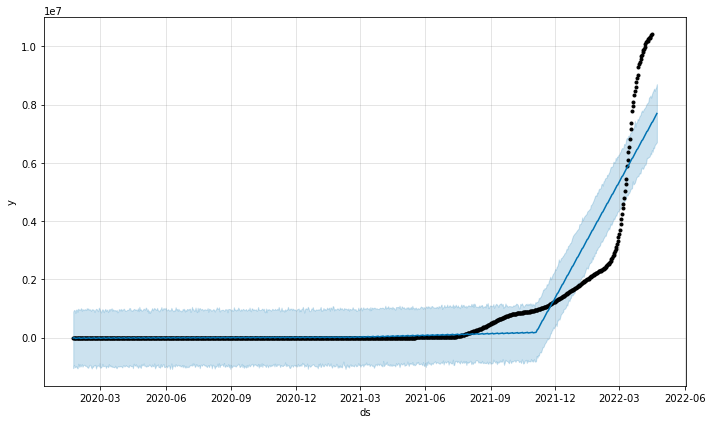

In [80]:
vnm_pred, vnm_plot = ProphetModel(vnm_data)

In [81]:
vnm_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,7405699,6.377823e+06,8.427673e+06
1,2022-04-18,7452972,6.523251e+06,8.469545e+06
2,2022-04-19,7500298,6.495045e+06,8.547300e+06
3,2022-04-20,7548061,6.606004e+06,8.470786e+06
4,2022-04-21,7597050,6.638507e+06,8.548114e+06
5,2022-04-22,7643851,6.671046e+06,8.586910e+06
6,2022-04-23,7694301,6.705001e+06,8.698580e+06


Thailand

Mean Square Error : 10513460243.422062


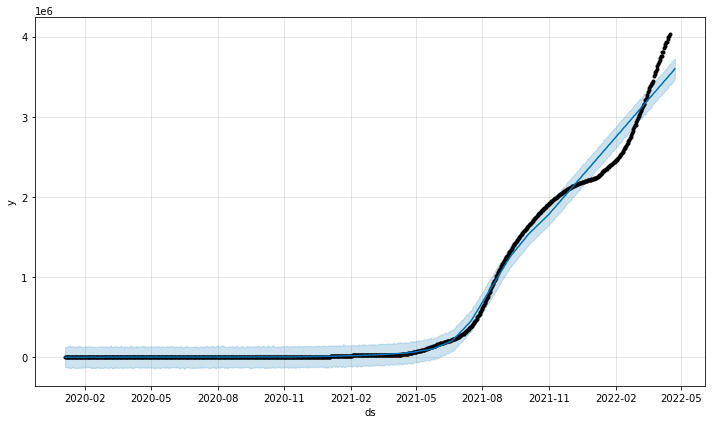

In [82]:
tha_pred, tha_plot = ProphetModel(tha_data)

In [83]:
tha_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,3530919,3.398147e+06,3.660737e+06
1,2022-04-18,3541416,3.401297e+06,3.682449e+06
2,2022-04-19,3551937,3.425370e+06,3.679134e+06
3,2022-04-20,3563230,3.431357e+06,3.697526e+06
4,2022-04-21,3574352,3.448238e+06,3.701657e+06
5,2022-04-22,3586092,3.457335e+06,3.719038e+06
6,2022-04-23,3597153,3.470802e+06,3.728858e+06


Philippines

Mean Square Error : 5836974890.477723


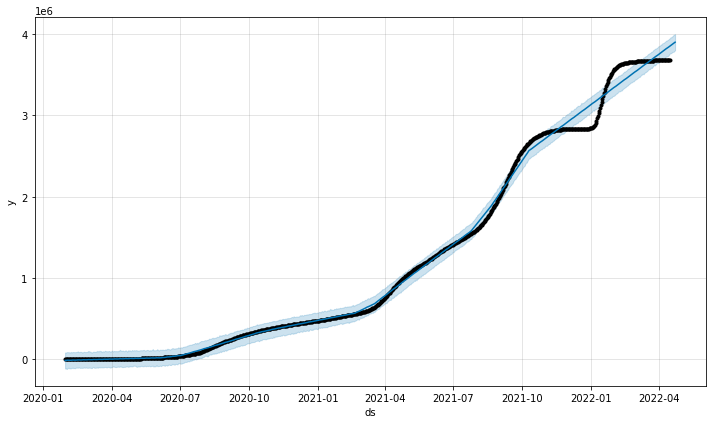

In [84]:
phl_pred, phl_plot = ProphetModel(phl_data)

In [85]:
phl_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,3862037,3.765873e+06,3.963457e+06
1,2022-04-18,3868843,3.767328e+06,3.961561e+06
2,2022-04-19,3874689,3.781380e+06,3.972889e+06
3,2022-04-20,3880556,3.782767e+06,3.976089e+06
4,2022-04-21,3887304,3.783495e+06,3.993535e+06
5,2022-04-22,3894389,3.794001e+06,3.995064e+06
6,2022-04-23,3901530,3.803065e+06,4.000650e+06


Singapore

Mean Square Error : 4378629725.500613


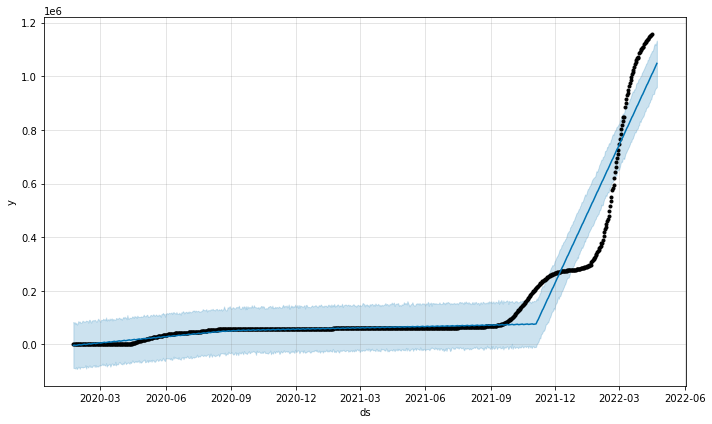

In [86]:
sgp_pred, sgp_plot = ProphetModel(sgp_data)

In [87]:
sgp_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,1012415,932849.915826,1.093912e+06
1,2022-04-18,1018051,933806.027797,1.102220e+06
2,2022-04-19,1024224,934303.803915,1.114998e+06
3,2022-04-20,1030423,948427.984682,1.121887e+06
4,2022-04-21,1036367,953699.391368,1.115539e+06
5,2022-04-22,1042377,956508.832723,1.121964e+06
6,2022-04-23,1048166,959878.857310,1.133340e+06


Malaysia

Mean Square Error : 13380766554.718674


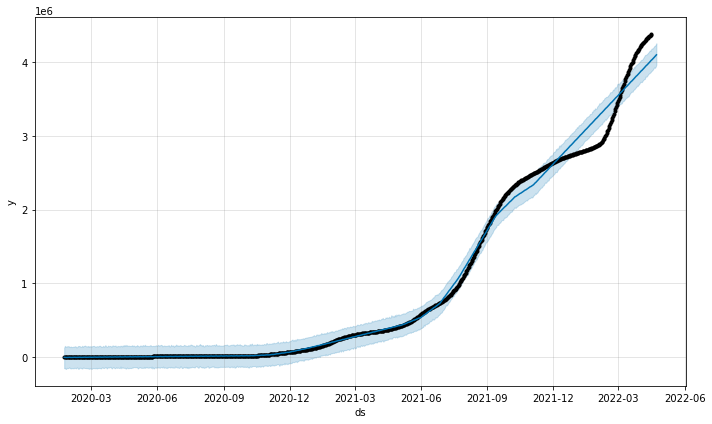

In [88]:
mys_pred, mys_plot = ProphetModel(mys_data)

In [89]:
mys_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,4036533,3.888097e+06,4.188574e+06
1,2022-04-18,4046615,3.900279e+06,4.188755e+06
2,2022-04-19,4057247,3.916635e+06,4.204754e+06
3,2022-04-20,4068205,3.930847e+06,4.219848e+06
4,2022-04-21,4079442,3.924561e+06,4.222402e+06
5,2022-04-22,4090679,3.940841e+06,4.239979e+06
6,2022-04-23,4101599,3.969539e+06,4.258414e+06


Myanmar

Mean Square Error : 42586512.03861518


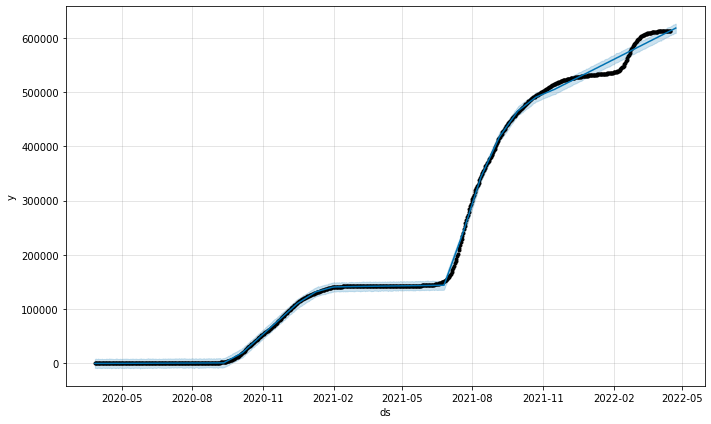

In [90]:
mmr_pred, mmr_plot = ProphetModel(mmr_data)

In [91]:
mmr_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,613456,605046.316247,621814.149434
1,2022-04-18,614113,606388.093024,622491.404985
2,2022-04-19,614868,606257.767077,623542.576897
3,2022-04-20,615636,607142.364895,624681.005795
4,2022-04-21,616369,608420.722426,624441.999922
5,2022-04-22,617143,608601.619535,625725.485140
6,2022-04-23,617843,608709.994436,625989.832910


Laos

Mean Square Error : 15668689.24535809


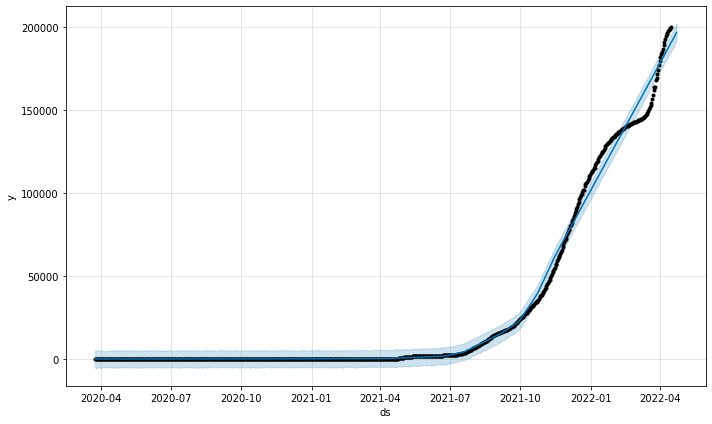

In [92]:
lao_pred, lao_plot = ProphetModel(lao_data)

In [93]:
lao_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,191443,186130.665278,196503.020152
1,2022-04-18,192226,187296.669408,197377.504524
2,2022-04-19,193101,187698.572349,198350.004619
3,2022-04-20,193997,188840.760442,199432.487094
4,2022-04-21,194861,190192.870219,200321.826338
5,2022-04-22,195766,190999.342567,201071.047541
6,2022-04-23,196614,191709.786779,201964.346173


Cambodia

Mean Square Error : 1938166.261405672


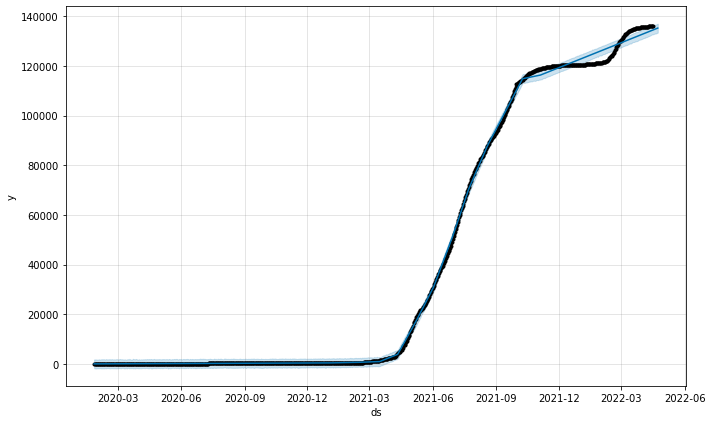

In [94]:
khm_pred, khm_plot = ProphetModel(khm_data)

In [95]:
khm_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,134627,132877.619107,136357.982358
1,2022-04-18,134738,133026.130004,136553.911486
2,2022-04-19,134848,133081.571391,136657.993054
3,2022-04-20,134959,133113.156027,136712.932228
4,2022-04-21,135074,133160.678122,136777.803932
5,2022-04-22,135190,133403.253335,136980.928286
6,2022-04-23,135298,133449.956315,137081.103679


 Brunei

Mean Square Error : 162282074.96488947


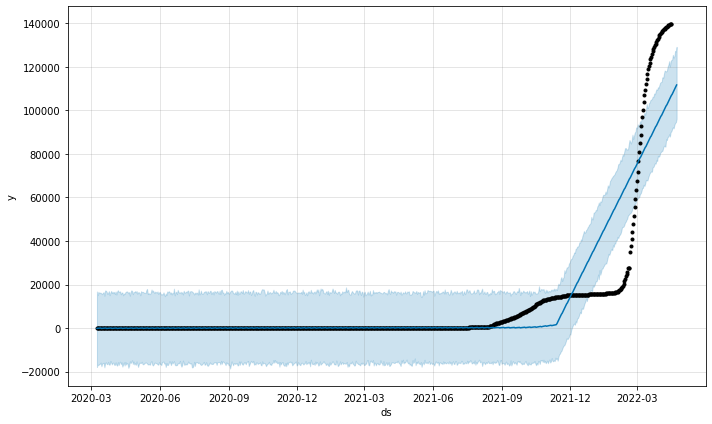

In [96]:
brn_pred, brn_plot = ProphetModel(brn_data)

In [97]:
brn_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,107356,91451.133243,123320.439138
1,2022-04-18,108099,92259.029576,125525.765789
2,2022-04-19,108821,91745.813767,124244.614218
3,2022-04-20,109537,93308.694981,124877.731375
4,2022-04-21,110267,94286.733136,127355.736040
5,2022-04-22,110975,94511.126585,127099.543902
6,2022-04-23,111676,96045.354050,129180.354580


Timor-Leste

Mean Square Error : 110351.54894179894


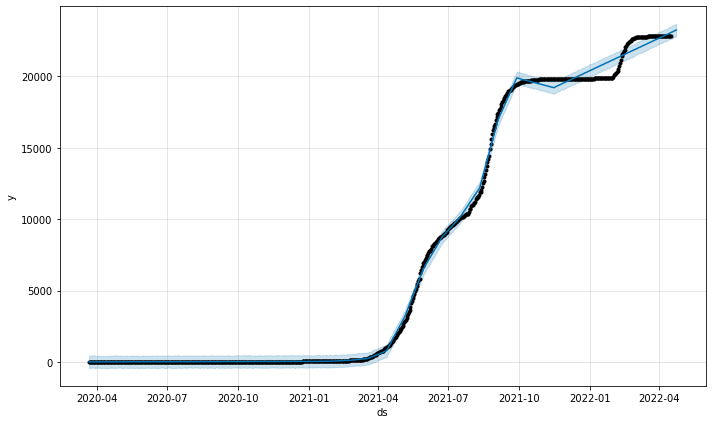

In [98]:
tls_pred, tls_plot = ProphetModel(tls_data)

In [99]:
tls_pred

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,23094,22642.800760,23536.213587
1,2022-04-18,23110,22638.551622,23546.285971
2,2022-04-19,23138,22731.447239,23592.974031
3,2022-04-20,23169,22734.613671,23568.022523
4,2022-04-21,23196,22759.389942,23628.875724
5,2022-04-22,23223,22820.687480,23656.540644
6,2022-04-23,23248,22810.530014,23691.018338


In [100]:
# combine result
list_result = [world_pred, idn_pred, vnm_pred, tha_pred, phl_pred, sgp_pred, mys_pred, mmr_pred
, lao_pred, khm_pred, brn_pred, tls_pred]
final_result = pd.concat(list_result).reset_index(drop=True)
final_result

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-17,508681482,4.972190e+08,5.194329e+08
1,2022-04-18,510365203,4.992346e+08,5.212668e+08
2,2022-04-19,512118204,5.006111e+08,5.241353e+08
3,2022-04-20,513938320,5.029279e+08,5.245617e+08
4,2022-04-21,515731019,5.041842e+08,5.263462e+08
...,...,...,...,...
79,2022-04-19,23138,2.273145e+04,2.359297e+04
80,2022-04-20,23169,2.273461e+04,2.356802e+04
81,2022-04-21,23196,2.275939e+04,2.362888e+04
82,2022-04-22,23223,2.282069e+04,2.365654e+04


In [101]:
final_result.to_csv('Regression_61070139-62070247-62070275.csv', index=True)